<a href="https://colab.research.google.com/github/dinelaganovic/InteligentniSistemi/blob/master/Identifikacija_klju%C4%8Dnih_fraza_u_recenzijama_proizvoda(drugidomaci).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Učitavanje CSV fajla
df = pd.read_csv("yelp.csv")

# Pregled prvih par redova
print(df.head())

# Selektuj tekstualno polje recenzija
reviews = df['text'][:1000]  # Ograniči na 1000 recenzija radi brzine


              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLiobPvh6cDC8JQg     0    

In [2]:
import spacy # koristimo spacy za tokenizaciju i lematizaciju

# Učitavanje spaCy modela
nlp = spacy.load("en_core_web_sm")

# Funkcija za lematizaciju i čišćenje teksta
def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

# Primena lematizacije na sve recenzije
lemmatized_reviews = [lemmatize_text(review) for review in reviews]

# Prikaz lematizovanih recenzija
print(lemmatized_reviews[:5])


['wife take birthday breakfast excellent   weather perfect sit outside overlook ground absolute pleasure   waitress excellent food arrive quickly semi busy Saturday morning   look like place fill pretty quickly early well \n\n favor Bloody Mary   phenomenal simply good   pretty sure use ingredient garden blend fresh order   amazing \n\n menu look excellent white truffle scramble eggs vegetable skillet tasty delicious   come 2 piece griddle bread amazing absolutely meal complete   good toast \n\n wait', 'idea people bad review place go probably gripe fault people like \n\n case friend arrive 5:50 pm past Sunday pretty crowded think Sunday evening think wait forever seat say seat girl come seat seat 5:52 waiter come get drink order pleasant host seat waiter server price good place order decide want 6:02 share baked spaghetti calzone small Beef pizza try calzone huge get small personal get small 11 pizza awesome friend like pizza well like calzone well calzone sweetish sauce like sauce \n

In [3]:
from spacy.matcher import PhraseMatcher #PhraseMatcher je koristan za identifikaciju specifičnih ključnih fraza

# Kreiranje PhraseMatcher-a
matcher = PhraseMatcher(nlp.vocab)
key_phrases = ["great service", "excellent food", "friendly staff", "high quality"]
patterns = [nlp.make_doc(phrase) for phrase in key_phrases]
matcher.add("KeyPhrases", patterns)

# Pronalaženje podudaranja fraza
for review in lemmatized_reviews[:10]:  # Provera za prvih 10 recenzija
    doc = nlp(review)
    matches = matcher(doc)
    print(f"Review: {review}")
    for match_id, start, end in matches:
        print(f"Matched Phrase: {doc[start:end]}")


Review: wife take birthday breakfast excellent   weather perfect sit outside overlook ground absolute pleasure   waitress excellent food arrive quickly semi busy Saturday morning   look like place fill pretty quickly early well 

 favor Bloody Mary   phenomenal simply good   pretty sure use ingredient garden blend fresh order   amazing 

 menu look excellent white truffle scramble eggs vegetable skillet tasty delicious   come 2 piece griddle bread amazing absolutely meal complete   good toast 

 wait
Matched Phrase: excellent food
Review: idea people bad review place go probably gripe fault people like 

 case friend arrive 5:50 pm past Sunday pretty crowded think Sunday evening think wait forever seat say seat girl come seat seat 5:52 waiter come get drink order pleasant host seat waiter server price good place order decide want 6:02 share baked spaghetti calzone small Beef pizza try calzone huge get small personal get small 11 pizza awesome friend like pizza well like calzone well ca

In [4]:
#Identifikujemo N-gramove i analiziramo njihovu učestalost
from sklearn.feature_extraction.text import CountVectorizer

# Kreiranje bigrama i trigrama
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words="english")
ngrams = vectorizer.fit_transform(lemmatized_reviews)
ngram_freq = pd.DataFrame(ngrams.toarray(), columns=vectorizer.get_feature_names_out())

# Prikaz najčešćih fraza
top_phrases = ngram_freq.sum().sort_values(ascending=False).head(10)
print("Top 10 ključnih fraza:")
print(top_phrases)


Top 10 ključnih fraza:
happy hour          56
feel like           53
pretty good         42
food good           35
good food           33
look like           33
great place         31
love place          30
ice cream           28
highly recommend    27
dtype: int64


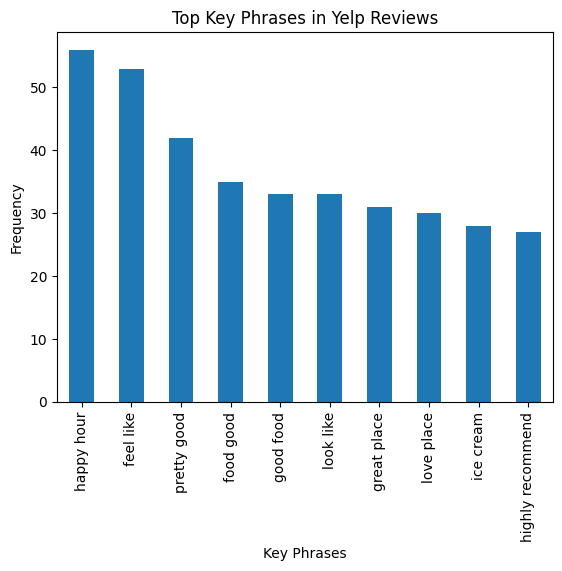

In [5]:
#Analiza učestalosti i evaluacija
#Pravimo grafikon učestalosti fraza
#Na kraju se dobija

#Lista ključnih fraza: Fraze koje se najčešće ponavljaju.
#Učestalost fraza: Statistički pregled najčešće korišćenih fraza.
#Vizualizacija: Grafički prikaz najvažnijih fraza.
import matplotlib.pyplot as plt

# Prikaz grafikona
top_phrases.plot(kind='bar', title='Top Key Phrases in Yelp Reviews')
plt.xlabel('Key Phrases')
plt.ylabel('Frequency')
plt.show()
